# Unscaled Model

## Step 1: Reading the processed dataset

In [39]:
import pandas as pd

In [40]:
train_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_train_sel.csv")
test_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_test_sel.csv")

train_data.head()

,age,job_n,education_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,42.0,3.0,0.0,100.0,4.0,1.4,93.918,-42.7,4.960,0
1,59.0,3.0,0.0,163.0,3.0,-2.9,92.201,-31.4,0.883,0
2,36.0,2.0,5.0,254.0,2.0,-1.1,94.767,-50.8,1.028,0
3,33.0,3.0,3.0,84.0,4.0,1.1,93.994,-36.4,4.859,0
4,42.0,0.0,1.0,95.0,3.0,-1.8,92.893,-46.2,1.270,0


In [41]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

## Step 2: Initialization and training of the model

In [42]:
from sklearn.linear_model import LogisticRegression
from pickle import dump
model = LogisticRegression()
model.fit(X_train, y_train)

dump(model, open("/workspaces/machine-learning-logistic-regression/models/model_no_scal.pk", "wb"))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 3: Model prediction

### Base model

##### Train

In [43]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.8992714025500911

##### Test

In [45]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
accuracy_score(y_test, y_pred)

0.9010441962117532

### Confusion matrix

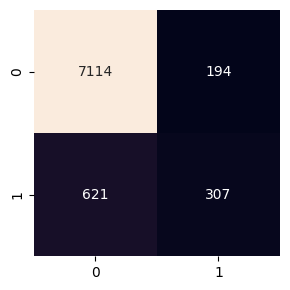

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Step 4: Optimization of results

In [48]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "dual": [True, False],
    "penalty": ["l1", "l2", "elasticnet", None],
    "fit_intercept": [True, False],
    "warm_start": [True, False],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "multi_class": ["auto", "ovr", "multinomial"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [49]:
grid.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear fail

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [50]:
grid.best_params_

{'C': 0.001,
 'dual': False,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'penalty': None,
 'solver': 'newton-cg',
 'warm_start': True}

In [51]:
best_model = grid.best_estimator_

dump(best_model, open("/workspaces/machine-learning-logistic-regression/models/best_model_no_scal.pk", "wb"))

##### Train

In [52]:
y_pred = best_model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
accuracy_score(y_train, y_pred)

0.9023375834851245

##### Test

In [54]:
y_pred_test = best_model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
accuracy_score(y_test, y_pred_test)

0.9023797960174842

### Confusion matrix

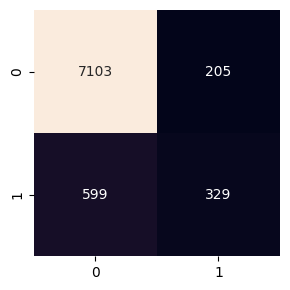

In [56]:
bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

# Scaled Model

## Step 1: Reading the processed dataset

In [57]:
train_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_train_sel_scal.csv")
test_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_test_sel_scal.csv")

train_data.head()

,age,job_n,education_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0.308642,0.3,0.000000,0.153846,0.6,1.000000,0.669135,0.338912,0.990838,0
1,0.518519,0.3,0.000000,0.251748,0.4,0.104167,0.000000,0.811715,0.057032,0
2,0.234568,0.2,0.833333,0.393162,0.2,0.479167,1.000000,0.000000,0.090243,0
3,0.197531,0.3,0.500000,0.128982,0.6,0.937500,0.698753,0.602510,0.967705,0
4,0.308642,0.0,0.166667,0.146076,0.4,0.333333,0.269680,0.192469,0.145671,0


In [58]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

## Step 2: Initialization and training of the model

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

dump(model, open("/workspaces/machine-learning-logistic-regression/models/model_scal.pk", "wb"))

### Train

In [60]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.9022161505768063

### Test

In [62]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [63]:
accuracy_score(y_test, y_pred)

0.9018941233608548

### Confusion matrix

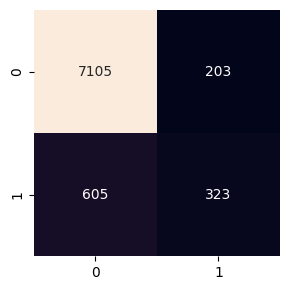

In [64]:
bank_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Step 4: Optimization of results

In [65]:
# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "dual": [True, False],
    "penalty": ["l1", "l2", "elasticnet", None],
    "fit_intercept": [True, False],
    "warm_start": [True, False],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "multi_class": ["auto", "ovr", "multinomial"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [66]:
grid.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: U

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: U

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [67]:
grid.best_params_

{'C': 0.001,
 'dual': False,
 'fit_intercept': True,
 'multi_class': 'auto',
 'penalty': None,
 'solver': 'newton-cholesky',
 'warm_start': True}

In [68]:
best_model = grid.best_estimator_

dump(best_model, open("/workspaces/machine-learning-logistic-regression/models/best_model_scal.pk", "wb"))

### Train

In [69]:
y_pred = best_model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
accuracy_score(y_train, y_pred)

0.902307225258045

### Test

In [71]:
y_pred = best_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [72]:
accuracy_score(y_test, y_pred)

0.9023797960174842

### Confusion matrix

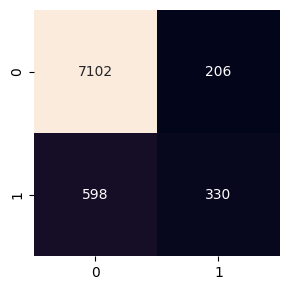

In [73]:
bank_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()